##### 影像的幾何變形
這篇教學會介紹 OpenCV 裡的 warpAffine() 和 warpPerspective() 方法，\
搭配 getPerspectiveTransform()、warpPerspective() 和 getAffineTransform()方法，\
就可以將影像進行平移、指定角度旋轉或透視的幾何變形效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### warpAffine() 平移影像 
warpAffine() 方法可以將來源的圖像，根據指定的「仿射矩陣」，輸出成仿射轉換後的新影像，矩陣必須採用 numpy 的矩陣格式，使用的方法如下：

In [ ]:
cv2.warpAffine(img, M, (w, h))
# img 來源圖像，M 仿射矩陣，(w, h) 圖片長寬

如果要平移影像，可以使用 2x3 的矩陣來實現，下方的程式碼執行後，會將圖片的垂直與水平方向，移動 100 像素。

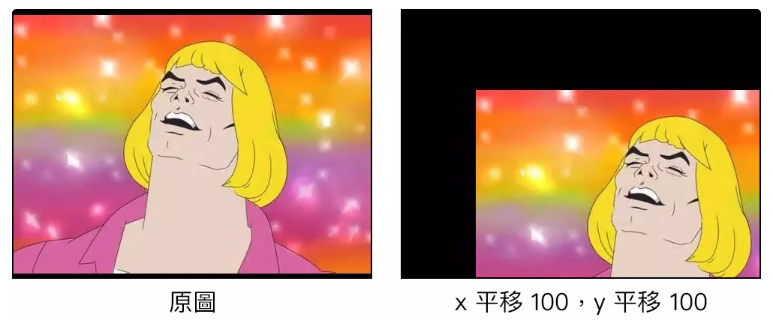

In [2]:
import cv2
import numpy as np
img = cv2.imread('meme_1.jpg')
M = np.float32([[1, 0, 100], [0, 1, 100]]) # 2x3 矩陣，x 軸平移 100，y 軸平移 100
output = cv2.warpAffine(img, M, (236, 236))
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)

#####  getRotationMatrix2D() 旋轉影像 
getRotationMatrix2D() 方法可以產生旋轉指定角度影像的仿射矩陣，再透過 warpAffine() 產生旋轉的影像，使用方式如下：

In [ ]:
cv2.getRotationMatrix2D((x, y), angle, scale)
# (x, y) 旋轉的中心點，angle 旋轉角度 ( - 順時針，+ 逆時針 )，scale 旋轉後的尺寸

下方的程式碼，會產生一張順時針旋轉 45 度的圖片。

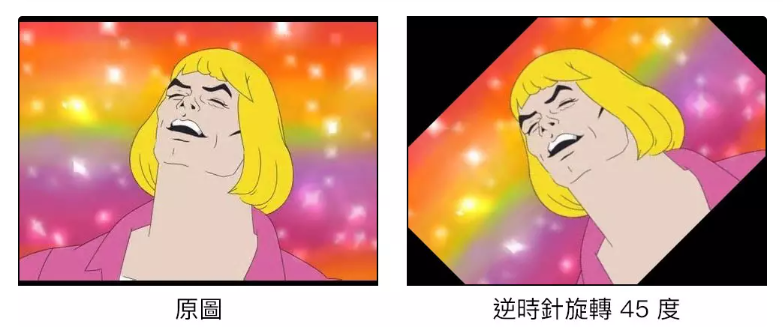

In [ ]:
import cv2
img = cv2.imread('meme_1.jpg')
M = cv2.getRotationMatrix2D((118, 118), 45, 1)    # 中心點 (240, 180)，旋轉 45 度，尺寸 1
output = cv2.warpAffine(img, M, (236, 236))
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)

##### getAffineTransform() 圖像仿射變換 
getAffineTransform() 方法，可以根據輸入影像的三個點，對應輸出影像的三個點，產生仿射矩陣，\
再透過 warpAffine() 產生仿射變換後的影像，使用 2x3 的 numpy 矩陣作為三個點的座標格式，\
使用方法如下：

In [ ]:
cv2.getAffineTransform(輸入影像三個點的座標，輸出影像三個點的座標)

下方的程式碼，會將左邊的圖片，仿射變換成右邊的圖片。

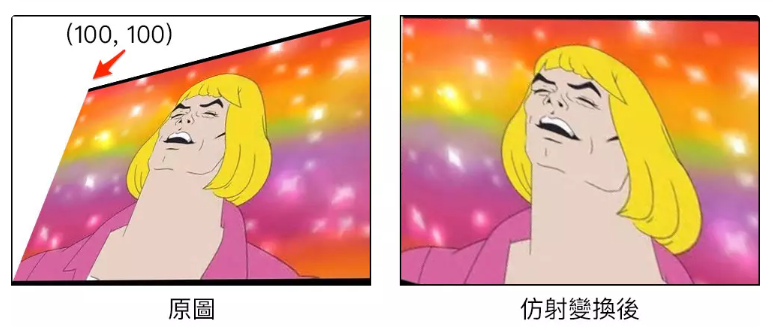

In [ ]:
import cv2
import numpy as np
img = cv2.imread('meme.jpg')
p1 = np.float32([[100,100],[480,0],[0,360]])
p2 = np.float32([[0,0],[480,0],[0,360]])
M = cv2.getAffineTransform(p1, p2)
output = cv2.warpAffine(img, M, (480, 360))
cv2.imshow('oxxostudio', output)

##### warpPerspective() + getPerspectiveTransform() 影像透視 
warpPerspective() 方法為影像透視的方法，根據指定的「透視矩陣」，輸出成透視轉換後的新影像，使用方法如下：

In [ ]:
cv2.warpPerspective(img, M, (w, h))
# img 來源圖像，M 透視矩陣，(w, h) 圖片長寬

getPerspectiveTransform() 方法，可以根據輸入影像的四個點，對應輸出影像的四個點，產生透視矩陣，\
再透過 warpPerspective() 產生透視變換後的影像，使用 2x4 的 numpy 矩陣作為四個點的座標格式，\
使用方法如下：

In [ ]:
cv2.getPerspectiveTransform(輸入影像四個點的座標，輸出影像四個點的座標)

下方的程式碼，會將左邊的圖片，透視變換成右邊的圖片。

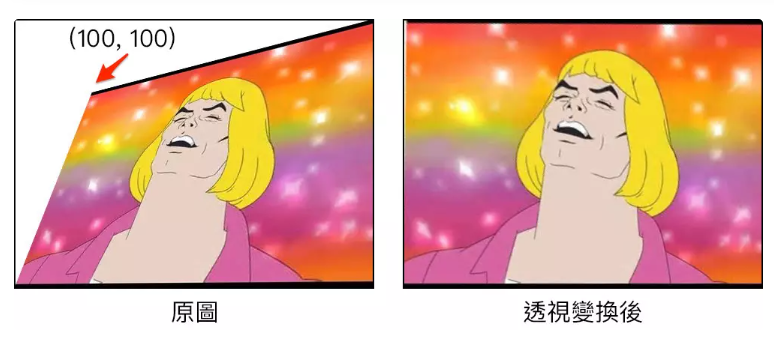

In [ ]:
import cv2
import numpy as np

p1 = np.float32([[100,100],[480,0],[0,360],[480,360]])
p2 = np.float32([[0,0],[480,0],[0,360],[480,360]])
m = cv2.getPerspectiveTransform(p1,p2)

img = cv2.imread('meme.jpg')
output = cv2.warpPerspective(img, m, (480, 360))
cv2.imshow('oxxostudio', output)